In [ ]:
import datetime
import random

def generate_guid():
    rand_num = f"{random.randrange(0, 9)}{random.randrange(0, 9)}"
    rand_letter = random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    return f"0-ZZZ12345678-{rand_num}{rand_letter}"

def generate_iot_message(guid, state, temperature):
    datestr = datetime.datetime.today().isoformat()
    return f'''{{"guid": "{guid}","destination": "0-AAA12345678","state": "{state}","eventTime": "{datestr}Z","payload": {{"format": "urn:example:sensor:temp","data": {{"temperature": {temperature:.1f}}}}}}}'''

def simulate_messages(num_msgs):
    device_state_map = {}
    temp_base = {'WA': 48.3, 'DE': 55.3, 'DC': 58.5, 'WI': 43.1,
                 'WV': 51.8, 'HI': 70.0, 'FL': 70.7, 'WY': 42.0,
                 'NH': 43.8, 'NJ': 52.7, 'NM': 53.4, 'TX': 64.8,
                 'LA': 66.4, 'NC': 59.0, 'ND': 40.4, 'NE': 48.8,
                 'TN': 57.6, 'NY': 45.4, 'PA': 48.8, 'CA': 59.4,
                 'NV': 49.9, 'VA': 55.1, 'CO': 45.1, 'AK': 26.6,
                 'AL': 62.8, 'AR': 60.4, 'VT': 42.9, 'IL': 51.8,
                 'GA': 63.5, 'IN': 51.7, 'IA': 47.8, 'OK': 59.6,
                 'AZ': 60.3, 'ID': 44.4, 'CT': 49.0, 'ME': 41.0,
                 'MD': 54.2, 'MA': 47.9, 'OH': 50.7, 'UT': 48.6,
                 'MO': 54.5, 'MN': 41.2, 'MI': 44.4, 'RI': 50.1,
                 'KS': 54.3, 'MT': 42.7, 'MS': 63.4, 'SC': 62.4,
                 'KY': 55.6, 'OR': 48.4, 'SD': 45.2}

    for _ in range(num_msgs):
        guid = generate_guid()
        state = random.choice(list(temp_base.keys()))

        if guid not in device_state_map:
            device_state_map[guid] = state

        temperature = random.uniform(temp_base[state] - 5, temp_base[state] + 5)
        message = generate_iot_message(guid, device_state_map[guid], temperature)
        print(message)

if __name__ == "__main__":
    num_msgs = int(input("Enter the number of simulated messages: "))
    simulate_messages(num_msgs)


Enter the number of simulated messages: 20
{"guid": "0-ZZZ12345678-41R","destination": "0-AAA12345678","state": "NC","eventTime": "2023-11-12T02:47:45.508466Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 54.4}}}
{"guid": "0-ZZZ12345678-13O","destination": "0-AAA12345678","state": "VA","eventTime": "2023-11-12T02:47:45.508608Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 51.0}}}
{"guid": "0-ZZZ12345678-84G","destination": "0-AAA12345678","state": "OH","eventTime": "2023-11-12T02:47:45.508670Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 52.4}}}
{"guid": "0-ZZZ12345678-10U","destination": "0-AAA12345678","state": "OK","eventTime": "2023-11-12T02:47:45.508719Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 61.7}}}
{"guid": "0-ZZZ12345678-87Y","destination": "0-AAA12345678","state": "AZ","eventTime": "2023-11-12T02:47:45.508758Z","payload": {"format": "urn:example:sensor:temp","dat

In [ ]:
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.4.1/kafka_2.12-3.4.1.tgz
!tar -xzf kafka_2.12-3.4.1.tgz

In [ ]:
!./kafka_2.12-3.4.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.4.1/config/zookeeper.properties
!./kafka_2.12-3.4.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.4.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [ ]:
!ps -ef | grep kafka

root        1211     135  0 02:48 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1213    1211  0 02:48 ?        00:00:00 grep kafka


In [ ]:
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
import pandas as pd

In [ ]:
!./kafka_2.12-3.4.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic IOT


Created topic IOT.


In [ ]:
!./kafka_2.12-3.4.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic IOT

Topic: IOT	TopicId: Ut-n2wY4SCGLLCibxASLCg	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: IOT	Partition: 0	Leader: 0	Replicas: 0	Isr: 0


In [ ]:
data=!python sensor_data-Copy.py
print(data[1:])

['{"guid": "0-ZZZ12345678-77J","destination": "0-AAA12345678","state": "OR","eventTime": "2023-11-12T02:49:07.379286Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 49.8}}}', '{"guid": "0-ZZZ12345678-44R","destination": "0-AAA12345678","state": "AL","eventTime": "2023-11-12T02:49:07.379361Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 64.4}}}', '{"guid": "0-ZZZ12345678-75D","destination": "0-AAA12345678","state": "WI","eventTime": "2023-11-12T02:49:07.379396Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 39.6}}}', '{"guid": "0-ZZZ12345678-15G","destination": "0-AAA12345678","state": "CO","eventTime": "2023-11-12T02:49:07.379413Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 40.2}}}', '{"guid": "0-ZZZ12345678-47M","destination": "0-AAA12345678","state": "VT","eventTime": "2023-11-12T02:49:07.379426Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 39.5}}}',

In [ ]:
def error_callback(exc):
    raise Exception('Error while sending data to Kafka: {0}'.format(str(exc)))

def write_to_kafka(topic_name, items):
    count = 0
    producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
    for item in items:
        key = str(count)
        producer.send(topic_name, key=key.encode('utf-8'), value=item.encode('utf-8')).add_errback(error_callback)
        count += 1
    producer.flush()
    print("Wrote {0} messages into topic: {1}".format(count, topic_name))


In [ ]:
write_to_kafka("IOT",data[1:])

Wrote 1000 messages into topic: IOT


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=47fba79b3fb32bddaf6a31188692be13c6ce580266b9eca6c0c8288548779b22
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession


In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

try:
    sc.stop()
except NameError:
    pass

spark = SparkSession.builder.appName('kafka_processing').getOrCreate()



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, DoubleType
from kafka import KafkaConsumer

# Creating a Kafka consumer
messages=!kafka_2.12-3.4.1/bin/kafka-console-consumer.sh --bootstrap-server 127.0.0.1:9092 --topic test2 --from-beginning

spark = SparkSession.builder.appName('kafka_processing').getOrCreate()
sc=spark.sparkContext


# Defining the schema for the incoming JSON data
schema = StructType([
    StructField("guid", StringType()),
    StructField("destination", StringType()),
    StructField("state", StringType()),
    StructField("eventTime", TimestampType()),
    StructField("payload", StructType([
        StructField("format", StringType()),
        StructField("data", StructType([
            StructField("temperature", DoubleType())
        ]))
    ]))
])


# Creating a PySpark DataFrame from the messages
df = spark.createDataFrame(messages, StringType())
df.show(truncate=False)

# Extracting the fields
json_df = df.select(from_json(df.value, schema).alias('data')).select('data.*')
json_df=json_df.na.drop()
json_df.show(truncate=False)



+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                               |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{"guid": "0-ZZZ12345678-77J","destination": "0-AAA12345678","state": "OR","eventTime": "2023-11-12T02:49:07.379286Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 49.8}}}|
|{"guid": "0-ZZZ12345678-44R","destination": "0-AAA12345678","state": "AL","eventTime": "2023-11-12T02:49:07.379361Z","payload": {"format": "urn:example:sensor:temp","data": {"temperature": 64.4}}}|
|{"gu

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import countDistinct

# creating a new column "temparature" to extract the temperature value
json_df.select("payload").show(truncate=False)
df = json_df.withColumn("temparature", col("payload.data.temperature"))
df.show()
from pyspark.sql.functions import avg

#Average tempararture by state
avg_temp=df.groupBy("state")
avg_temp=avg_temp.agg(avg("temparature").alias("avg_temperature"))
avg_temp.show()



# group by state and count number of unique devices
num_devices_by_state = df.groupBy('state').count()
num_devices_by_state.show(50)
num_devices_by_state.count()


num_of_messages=df.count()
print("Number of messages:",num_of_messages)


total_devices = df.select(countDistinct('guid')).collect()[0][0]
print("Total number of devices:", total_devices)


+---------------------------------+
|payload                          |
+---------------------------------+
|{urn:example:sensor:temp, {49.8}}|
|{urn:example:sensor:temp, {64.4}}|
|{urn:example:sensor:temp, {39.6}}|
|{urn:example:sensor:temp, {40.2}}|
|{urn:example:sensor:temp, {39.5}}|
|{urn:example:sensor:temp, {41.0}}|
|{urn:example:sensor:temp, {61.1}}|
|{urn:example:sensor:temp, {55.0}}|
|{urn:example:sensor:temp, {52.4}}|
|{urn:example:sensor:temp, {54.4}}|
|{urn:example:sensor:temp, {39.0}}|
|{urn:example:sensor:temp, {57.0}}|
|{urn:example:sensor:temp, {45.7}}|
|{urn:example:sensor:temp, {49.4}}|
|{urn:example:sensor:temp, {50.3}}|
|{urn:example:sensor:temp, {54.2}}|
|{urn:example:sensor:temp, {54.8}}|
|{urn:example:sensor:temp, {52.4}}|
|{urn:example:sensor:temp, {54.4}}|
|{urn:example:sensor:temp, {51.5}}|
+---------------------------------+
only showing top 20 rows

+-----------------+-------------+-----+--------------------+--------------------+-----------+
|             gu

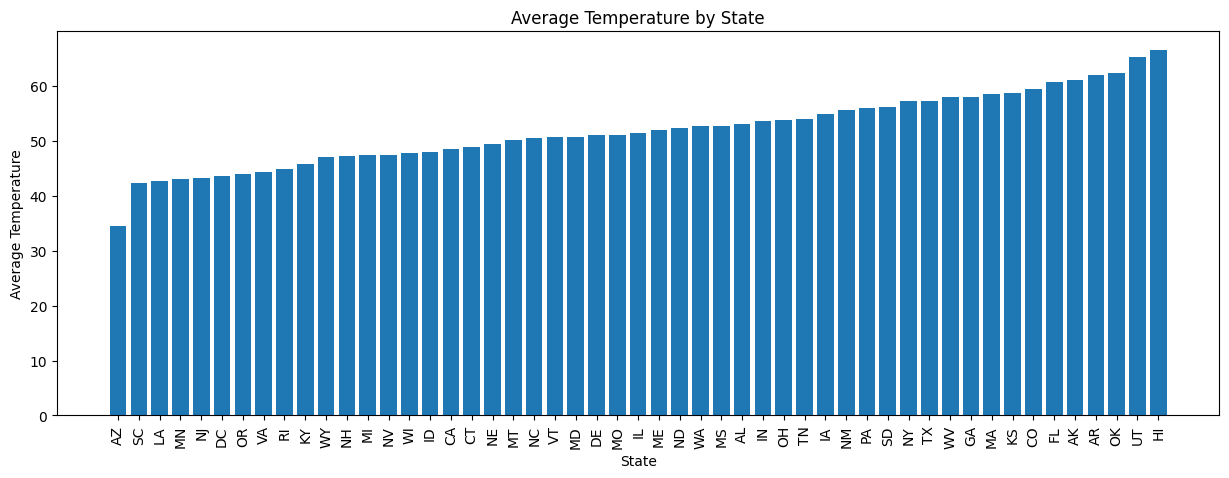

In [ ]:
import matplotlib.pyplot as plt

states = [row['state'] for row in avg_temp.collect()]
avg_temps = [row['avg_temperature'] for row in avg_temp.collect()]
avg_temps_sorted=sorted(avg_temps)
plt.figure(figsize=(15,8))
plt.bar(states, avg_temps_sorted)
plt.xlabel('State')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by State')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)
plt.show()


In [24]:
import plotly.express as px
import pandas as pd

num_devices_by_state_pd = num_devices_by_state.toPandas()
fig = px.choropleth(num_devices_by_state_pd, locations='state', locationmode='USA-states', color='count', scope='usa',color_continuous_scale='Blues', range_color=(0, num_devices_by_state_pd['count'].max()))
fig.update_layout(title='Total Number of Devices by State')
fig.show()
